In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('br-capes-colsucup-prog-2013a2016-2020-06-12_2016.csv',sep=';',encoding='latin1') #dados de 2016

#df=pd.read_csv('br-capes-colsucup-prog-2018-2020-06-12.csv',sep=';') #dados de 2018

In [3]:
df.head()

,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_SUBAREA_CONHECIMENTO,NM_ESPECIALIDADE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,CD_ENTIDADE_CAPES,CD_ENTIDADE_EMEC,SG_ENTIDADE_ENSINO,...,CD_CONCEITO_PROGRAMA,ANO_INICIO_PROGRAMA,AN_INICIO_CURSO,IN_REDE,SG_ENTIDADE_ENSINO_REDE,DS_SITUACAO_PROGRAMA,DT_SITUACAO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_FOTO_PROGRAMA,DS_CLIENTELA_QUADRIENAL_2017
0,2016,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,NÃO SE APLICA,NÃO SE APLICA,9,CIÊNCIAS BIOLÓGICAS III,10001018,699,UNIR,...,3,2001,2001/2005,NÃO,NaN,EM FUNCIONAMENTO,30DEC2013:00:00:00,121358,57437,AVALIAÇÃO
1,2016,MULTIDISCIPLINAR,INTERDISCIPLINAR,MEIO AMBIENTE E AGRÁRIAS,NÃO SE APLICA,45,INTERDISCIPLINAR,10001018,699,UNIR,...,4,1999,1999/2013,NÃO,NaN,EM FUNCIONAMENTO,13NOV2013:00:00:00,122262,58288,AVALIAÇÃO
2,2016,CIÊNCIAS HUMANAS,GEOGRAFIA,NÃO SE APLICA,NÃO SE APLICA,36,GEOGRAFIA,10001018,699,UNIR,...,4,2006,2006/2015,NÃO,NaN,EM FUNCIONAMENTO,19JUN2013:00:00:00,123170,59126,AVALIAÇÃO
3,2016,CIÊNCIAS SOCIAIS APLICADAS,ADMINISTRAÇÃO,NÃO SE APLICA,NÃO SE APLICA,27,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",10001018,699,UNIR,...,4,2006,2006,NÃO,NaN,EM FUNCIONAMENTO,30DEC2013:00:00:00,122595,58559,AVALIAÇÃO
4,2016,CIÊNCIAS HUMANAS,PSICOLOGIA,NÃO SE APLICA,NÃO SE APLICA,37,PSICOLOGIA,10001018,699,UNIR,...,3,2009,2009,NÃO,NaN,EM FUNCIONAMENTO,29MAY2013:00:00:00,121783,57820,AVALIAÇÃO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   AN_BASE                        4186 non-null   int64 
 1   NM_GRANDE_AREA_CONHECIMENTO    4186 non-null   object
 2   NM_AREA_CONHECIMENTO           4186 non-null   object
 3   NM_SUBAREA_CONHECIMENTO        4186 non-null   object
 4   NM_ESPECIALIDADE               4186 non-null   object
 5   CD_AREA_AVALIACAO              4186 non-null   int64 
 6   NM_AREA_AVALIACAO              4186 non-null   object
 7   CD_ENTIDADE_CAPES              4186 non-null   int64 
 8   CD_ENTIDADE_EMEC               4186 non-null   object
 9   SG_ENTIDADE_ENSINO             4186 non-null   object
 10  NM_ENTIDADE_ENSINO             4186 non-null   object
 11  CS_STATUS_JURIDICO             4186 non-null   object
 12  DS_DEPENDENCIA_ADMINISTRATIVA  4186 non-null   object
 13  DS_

#vendo quais troços dos dados de 2018 estão dando problema 
index=0
for i in list(df['AN_INICIO_PROGRAMA'].values):
    try:
        int(i)
    except ValueError:
        print(index)
    index+=1

In [5]:
#Vendo como os estados desempenham 
estados=df.groupby('SG_UF_PROGRAMA').mean()['CD_CONCEITO_PROGRAMA']
estados=estados.apply(lambda x: round(x,2))
estados.sort_values(ascending=False)

SG_UF_PROGRAMA
SP    4.40
RJ    4.21
RS    4.10
DF    4.06
MG    4.03
SC    3.90
PE    3.82
CE    3.76
PR    3.71
PB    3.63
BA    3.62
RN    3.59
PA    3.53
GO    3.51
ES    3.51
AM    3.42
SE    3.42
MS    3.41
AL    3.41
MT    3.37
AP    3.25
RO    3.25
MA    3.24
TO    3.23
PI    3.20
AC    3.20
RR    3.14
Name: CD_CONCEITO_PROGRAMA, dtype: float64

In [6]:
#Vendo como as centro de pesquisas desempenham
unis=df[df['SG_UF_PROGRAMA']=='RJ']
unis=unis.groupby('SG_ENTIDADE_ENSINO').mean()['CD_CONCEITO_PROGRAMA']
unis=unis.apply(lambda x: round(x,2))
unis.sort_values(ascending=False)

SG_ENTIDADE_ENSINO
INCA          6.00
LNCC          6.00
IMPA          5.50
CBPF          5.50
SBM           5.00
PUC-RIO       4.88
UFRJ          4.79
FGV/RJ        4.67
FIOCRUZ       4.60
ON            4.50
UERJ          4.33
UNESA         4.20
UENF          4.07
IBMEC         4.00
IEAPM         4.00
ENCE          4.00
INPI          4.00
JBRJ          4.00
ECEME         4.00
IRD           4.00
UNIGRANRIO    4.00
UNIFA         4.00
UFF           3.83
UVA           3.80
UNIVERSO      3.67
UFRRJ         3.66
IME           3.62
UNIRIO        3.55
UNIFOA        3.50
UNISUAM       3.50
INMETRO       3.50
UCAM          3.43
CEFET/RJ      3.38
IFRJ          3.33
UCP/RJ        3.25
INC           3.00
ESPM          3.00
CESGRANRIO    3.00
CPII          3.00
USS           3.00
EGN           3.00
MAST          3.00
UEZO          3.00
FCRB          3.00
INTO          3.00
USU           3.00
FUCAPE-RJ     3.00
IPHAN         3.00
IEN           3.00
IFF           3.00
UNIPLI        2.00
Name: CD_CON

In [7]:
def conceito_capes(universidade:str):
    '''Faz um gráfico de barras do conceito CAPES dos conceitos dos PPG de uma universidade.'''
    uni=df[df['SG_ENTIDADE_ENSINO']==universidade]
    sns.countplot(x='CD_CONCEITO_PROGRAMA',data=uni,color='black')
    plt.title('Coceito CAPES de PPG da '+str(universidade))
    plt.xlabel('Conceito Capes do Programa')
    plt.ylabel('Contagem')

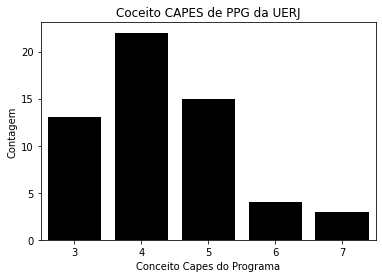

In [8]:
conceito_capes('UERJ')

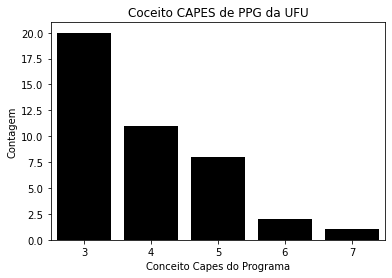

In [9]:
conceito_capes('UFU')

In [10]:
df[df['SG_ENTIDADE_ENSINO']=='UERJ'].query("CD_CONCEITO_PROGRAMA ==5")

,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_SUBAREA_CONHECIMENTO,NM_ESPECIALIDADE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,CD_ENTIDADE_CAPES,CD_ENTIDADE_EMEC,SG_ENTIDADE_ENSINO,...,CD_CONCEITO_PROGRAMA,ANO_INICIO_PROGRAMA,AN_INICIO_CURSO,IN_REDE,SG_ENTIDADE_ENSINO_REDE,DS_SITUACAO_PROGRAMA,DT_SITUACAO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_FOTO_PROGRAMA,DS_CLIENTELA_QUADRIENAL_2017
1372,2016,CIÊNCIAS DA SAÚDE,ODONTOLOGIA,NÃO SE APLICA,NÃO SE APLICA,18,ODONTOLOGIA,31004016,547,UERJ,...,5,1982,1982/1998,NÃO,NaN,EM FUNCIONAMENTO,15MAR2013:00:00:00,123179,59109,AVALIAÇÃO
1374,2016,CIÊNCIAS HUMANAS,PSICOLOGIA,NÃO SE APLICA,NÃO SE APLICA,37,PSICOLOGIA,31004016,547,UERJ,...,5,1991,1991/2001,NÃO,NaN,EM FUNCIONAMENTO,01JUL2013:00:00:00,124003,59903,AVALIAÇÃO
1376,2016,CIÊNCIAS HUMANAS,FILOSOFIA,NÃO SE APLICA,NÃO SE APLICA,33,FILOSOFIA,31004016,547,UERJ,...,5,1992,1992/1998,NÃO,NaN,EM FUNCIONAMENTO,15JAN2014:00:00:00,120578,56689,AVALIAÇÃO
1379,2016,CIÊNCIAS HUMANAS,SOCIOLOGIA,NÃO SE APLICA,NÃO SE APLICA,34,SOCIOLOGIA,31004016,547,UERJ,...,5,1994,1994/1999,NÃO,NaN,EM FUNCIONAMENTO,02MAY2013:00:00:00,120852,56981,AVALIAÇÃO
1380,2016,MULTIDISCIPLINAR,INTERDISCIPLINAR,ENGENHARIA/TECNOLOGIA/GESTÃO,NÃO SE APLICA,45,INTERDISCIPLINAR,31004016,547,UERJ,...,5,1995,1995/2000,NÃO,NaN,EM FUNCIONAMENTO,02DEC2013:00:00:00,122931,58884,AVALIAÇÃO
1381,2016,CIÊNCIAS EXATAS E DA TERRA,FÍSICA,NÃO SE APLICA,NÃO SE APLICA,3,ASTRONOMIA / FÍSICA,31004016,547,UERJ,...,5,1997,1997/2003,NÃO,NaN,EM FUNCIONAMENTO,22JUN2010:00:00:00,111655,48592,AVALIAÇÃO
1383,2016,CIÊNCIAS HUMANAS,HISTÓRIA,NÃO SE APLICA,NÃO SE APLICA,40,HISTÓRIA,31004016,547,UERJ,...,5,1995,1995/2003,NÃO,NaN,EM FUNCIONAMENTO,24JUN2013:00:00:00,120959,57061,AVALIAÇÃO
1384,2016,CIÊNCIAS DA SAÚDE,ENFERMAGEM,NÃO SE APLICA,NÃO SE APLICA,20,ENFERMAGEM,31004016,547,UERJ,...,5,1998,1998/2010,NÃO,NaN,EM FUNCIONAMENTO,01AUG2013:00:00:00,123967,59840,AVALIAÇÃO
1388,2016,ENGENHARIAS,ENGENHARIA SANITÁRIA,NÃO SE APLICA,NÃO SE APLICA,10,ENGENHARIAS I,31004016,547,UERJ,...,5,1999,1999,NÃO,NaN,EM FUNCIONAMENTO,10SEP2012:00:00:00,120591,56722,AVALIAÇÃO
1390,2016,CIÊNCIAS SOCIAIS APLICADAS,COMUNICAÇÃO,NÃO SE APLICA,NÃO SE APLICA,31,COMUNICAÇÃO E INFORMAÇÃO,31004016,547,UERJ,...,5,2002,2002/2012,NÃO,NaN,EM FUNCIONAMENTO,30OCT2012:00:00:00,119861,56086,AVALIAÇÃO


(1955.0, 2020.0)

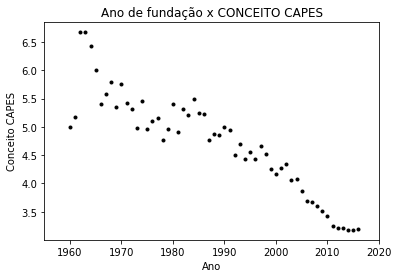

In [11]:
#ano de fundação versus conceito

ano=df.groupby('ANO_INICIO_PROGRAMA').mean()['CD_CONCEITO_PROGRAMA']
ano=ano.apply(lambda x: round(x,2))
ano.sort_values(ascending=False)
plt.scatter(ano.index,ano.values,color='black',marker='.')
plt.xlabel('Ano')
plt.ylabel('Conceito CAPES')
plt.title('Ano de fundação x CONCEITO CAPES')
plt.xlim(1955,2020)

In [12]:
from Reglin import curva

In [18]:
def func(x,a,c):
    return a+1/(x+c)

/home/gustavo/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([4.70913357, 1.        ])

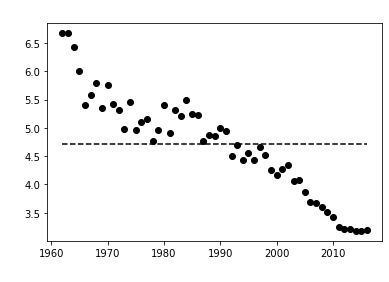

In [19]:
curva(ano.index[3:],ano.values[3:],func)